In [2]:
import pandas as pd
from pandas import Series, DataFrame

#from pandas_datareader import data
from pandas.tseries.offsets import Day, MonthEnd
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import FinanceDataReader as fdr

In [3]:
from tqdm import tqdm_notebook as tn

In [8]:
tickers = ['SPY', 'IEV', 'EWJ', 'EEM', 'TLO', 'IEF', 'IYR', 'RWX', 'GLD', 'DBC']
start = '2007'

all_data = {}
for ticker in tn(tickers, desc="ticker종가", mininterval=1):
    all_data[ticker] = fdr.DataReader(ticker,start)

prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})

In [9]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3214 entries, 2007-01-02 to 2019-04-30
Data columns (total 10 columns):
SPY    3179 non-null float64
IEV    3178 non-null float64
EWJ    3178 non-null float64
EEM    3178 non-null float64
TLO    2413 non-null float64
IEF    960 non-null float64
IYR    3178 non-null float64
RWX    3179 non-null float64
GLD    3178 non-null float64
DBC    3178 non-null float64
dtypes: float64(10)
memory usage: 276.2 KB


In [11]:
!pip install missingno

In [12]:
%matplotlib inline

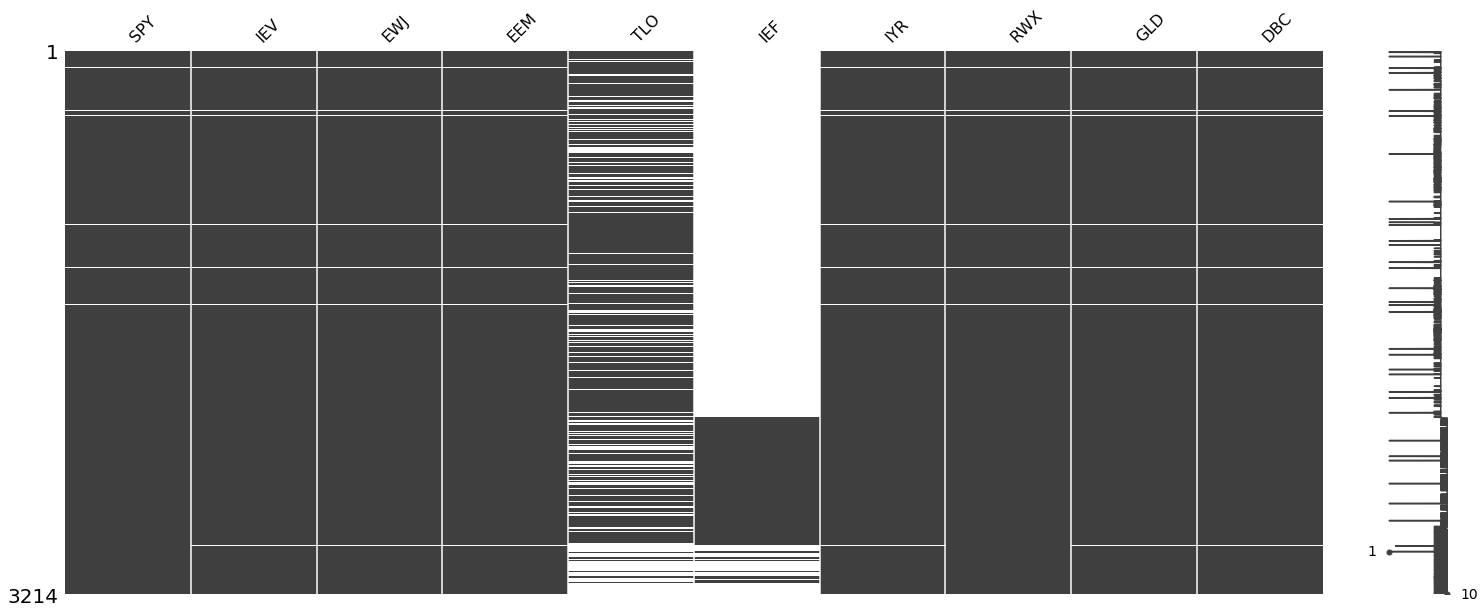

In [13]:
#누락값 보기
import missingno as msno

msno.matrix(prices)
plt.show()

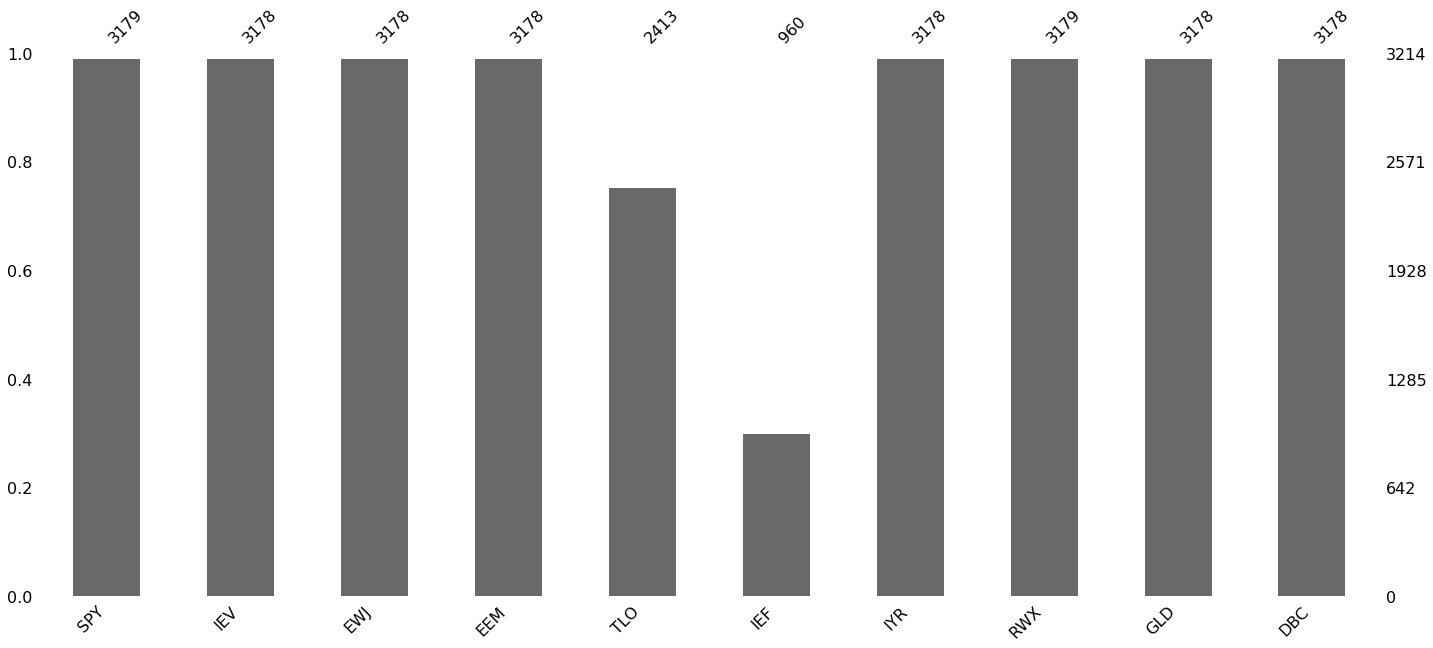

In [14]:
msno.bar(prices)
plt.show()

In [16]:
prices['TLO'].isna().sum()

801

In [17]:
prices['TLO']

Date
2007-01-02    1.120
2007-01-03    1.100
2007-01-04    1.100
2007-01-05    1.100
2007-01-08    1.120
2007-01-09    1.160
2007-01-10    1.300
2007-01-11    1.160
2007-01-12    1.160
2007-01-15    1.250
2007-01-16    1.230
2007-01-17    1.160
2007-01-18    1.180
2007-01-19    1.250
2007-01-22    1.240
2007-01-23      NaN
2007-01-24    1.170
2007-01-25    1.160
2007-01-26    1.160
2007-01-29    1.080
2007-01-30    1.050
2007-01-31    1.050
2007-02-01    1.100
2007-02-02    1.110
2007-02-05    1.070
2007-02-06    1.070
2007-02-07    1.120
2007-02-08    1.060
2007-02-09    1.010
2007-02-12    0.960
              ...  
2019-03-27    0.095
2019-03-28      NaN
2019-03-29    0.100
2019-03-30      NaN
2019-04-01      NaN
2019-04-02      NaN
2019-04-03    0.100
2019-04-04    0.110
2019-04-05    0.120
2019-04-06      NaN
2019-04-08    0.110
2019-04-09      NaN
2019-04-10    0.135
2019-04-11    0.125
2019-04-12    0.125
2019-04-13      NaN
2019-04-15    0.120
2019-04-16    0.130
2019-04-17    0

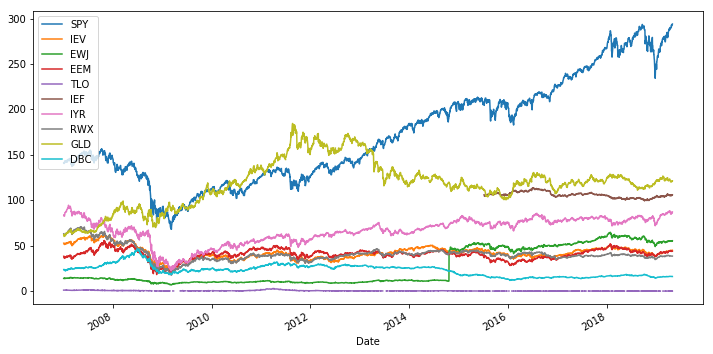

In [23]:
prices.plot(figsize=(12,6), legend=True)

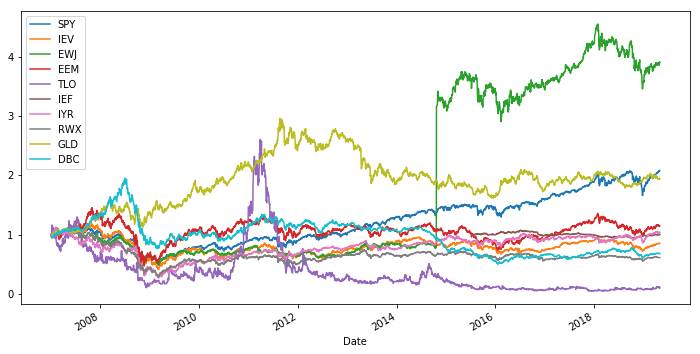

In [24]:
for col in prices.columns:
    pct_returns = prices[col].pct_change()
    pct_returns = (1 + pct_returns).cumprod()
    pct_returns[0] = 1
    pct_returns.plot(figsize=(12,6), legend=True)

In [25]:
# 누락값 행 삭제
prices.dropna(axis=0)

,SPY,IEV,EWJ,EEM,TLO,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2015-07-08,204.53,42.21,49.24,36.78,0.105,106.11,73.61,40.48,111.09,16.99
2015-07-09,204.90,42.95,49.84,37.49,0.135,105.37,73.26,40.87,111.36,17.19
2015-07-10,207.48,44.75,50.64,38.44,0.130,104.64,73.77,41.69,111.49,17.27
2015-07-13,209.77,44.78,51.32,38.70,0.140,104.36,73.88,42.17,110.99,17.28
2015-07-14,210.68,45.16,51.64,38.77,0.125,104.69,74.08,42.49,110.74,17.22
2015-07-15,210.61,44.95,51.60,38.33,0.115,105.09,74.15,42.37,110.16,17.02
2015-07-16,212.30,45.36,51.80,38.81,0.115,105.05,74.68,42.79,109.76,16.94
2015-07-17,212.48,45.20,51.92,38.76,0.120,105.06,74.39,42.81,108.65,16.85
2015-07-20,212.59,45.34,51.92,38.51,0.120,104.85,74.52,42.73,105.70,16.58


In [29]:
prices = prices.fillna(method = 'ffill')
rets = prices.pct_change(1)

In [30]:
prices.tail(10)

,SPY,IEV,EWJ,EEM,TLO,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2019-04-19,290.02,44.86,55.35,44.56,0.130,105.32,85.64,38.65,120.37,16.21
2019-04-20,290.02,44.86,55.35,44.56,0.130,105.32,85.64,38.65,120.37,16.21
2019-04-22,290.27,44.88,55.15,44.27,0.130,105.17,84.80,38.59,120.37,16.29
2019-04-23,292.88,44.86,55.46,44.37,0.120,105.36,85.81,38.59,120.12,16.31
2019-04-24,292.23,44.61,54.78,43.77,0.130,105.76,86.37,38.67,120.47,16.25
2019-04-25,292.05,44.52,54.90,43.71,0.130,105.63,86.20,38.64,120.57,16.22
2019-04-26,293.41,44.58,55.40,43.88,0.120,105.91,86.85,38.74,121.37,16.03
2019-04-27,293.41,44.58,55.40,43.88,0.120,105.91,86.85,38.74,121.37,16.03
2019-04-29,293.87,44.80,55.62,43.97,0.100,105.69,86.02,38.68,120.83,16.04


In [26]:
fee = 0.0030
lookback = 12
num = 5

In [31]:
#--- Find Endpoints of Month ---#
s = pd.Series(np.arange(prices.shape[0]), index=prices.index)

In [32]:
ep = s.resample("BM").max()

In [34]:
wts = list()

for i in tn(range(lookback, len(ep))) :
    ## prices.index[ep[i]]       check the calendar
    cumret = prices.iloc[ep[i]] / prices.iloc[ep[i-12]] - 1
    K = rankdata(-cumret) <= num
    
    wt = np.repeat(0.00, prices.shape[1], axis = 0)
    wt[K] = 1 / num
    wt = pd.DataFrame(data = wt.reshape(1,prices.shape[1]),
                      index = [prices.index[ep[i]]],
                      columns = [prices.columns])
    wts.append(wt)
    
wts = pd.concat(wts)

In [35]:
wts

,SPY,IEV,EWJ,EEM,TLO,IEF,IYR,RWX,GLD,DBC
2008-01-31,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.2
2008-02-29,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.2
2008-03-31,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.2
2008-04-30,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.2
2008-05-30,0.0,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2
2008-06-30,0.2,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2
2008-07-31,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.2,0.2
2008-08-29,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.2,0.2
2008-09-30,0.2,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.2,0.2
2008-10-31,0.2,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.2,0.2


In [46]:
def ReturnPortfolio(R, weights):
    if R.isnull().values.any() :
        print("NA's detected: filling NA's with zeros")
        R[np.isnan(R)] = 0

    if R.shape[1] != weights.shape[1] :
        print("Columns of Return and Weight is not same")        ## Check The Column Dimension
               
    if R.index[-1] < weights.index[0] + pd.DateOffset(days=1) :
        print("Last date in series occurs before beginning of first rebalancing period")
           
    if R.index[0] < weights.index[0] :
        R = R.loc[R.index > weights.index[0] + pd.DateOffset(days=1)]   ## Subset the Return object if the first rebalance date is after the first date 
     
    bop_value = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    eop_value = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    bop_weights = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    eop_weights = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    
    bop_value_total = pd.DataFrame(data = np.zeros(shape = R.shape[0]), index = R.index)
    eop_value_total = pd.DataFrame(data = np.zeros(shape = R.shape[0]), index = R.index)
    ret = pd.DataFrame(data = np.zeros(shape = R.shape[0]), index = R.index)
                       
    end_value = 1   # The end_value is the end of period total value from the prior period
    
    k = 0
    
    for i in range(0 , len(weights) -1 ) :
        fm = weights.index[i] + pd.DateOffset(days=1)
        to = weights.index[i + 1]            
        returns = R.loc[fm : to, ]

        jj = 0
        
        for j in range(0 , len(returns) ) :
            if jj == 0 :
                bop_value.iloc[k, :] = end_value * weights.iloc[i, :]
            else :
                bop_value.iloc[k, :] = eop_value.iloc[k-1, :]
            
            bop_value_total.iloc[k] = bop_value.iloc[k, :].sum()
                        
            # Compute end of period values
            eop_value.iloc[k, :] = (1 + returns.iloc[j, :]) * bop_value.iloc[k, :]
            eop_value_total.iloc[k] = eop_value.iloc[k, :].sum()
            
            # Compute portfolio returns
            ret.iloc[k] = eop_value_total.iloc[k] / end_value - 1
            end_value = float(eop_value_total.iloc[k])
            
            # Compute BOP and EOP weights
            bop_weights.iloc[k, :] = bop_value.iloc[k, :] / float(bop_value_total.iloc[k])
            eop_weights.iloc[k, :] = eop_value.iloc[k, :] / float(eop_value_total.iloc[k])
    
            jj += 1
            k += 1
    
    result = {'ret' : ret, 'bop_weights' : bop_weights, 'eop_weights' : eop_weights}
    return(result)

In [47]:
result = ReturnPortfolio(rets, wts)

In [48]:
result

{'ret':               0
 Date           
 2008-02-04 -1.0
 2008-02-05  NaN
 2008-02-06  NaN
 2008-02-07  NaN
 2008-02-08  NaN
 2008-02-11  NaN
 2008-02-12  NaN
 2008-02-13  NaN
 2008-02-14  NaN
 2008-02-15  NaN
 2008-02-19  NaN
 2008-02-20  NaN
 2008-02-21  NaN
 2008-02-22  NaN
 2008-02-25  NaN
 2008-02-26  NaN
 2008-02-27  NaN
 2008-02-28  NaN
 2008-02-29  NaN
 2008-03-03  NaN
 2008-03-04  NaN
 2008-03-05  NaN
 2008-03-06  NaN
 2008-03-07  NaN
 2008-03-10  NaN
 2008-03-11  NaN
 2008-03-12  NaN
 2008-03-13  NaN
 2008-03-14  NaN
 2008-03-17  NaN
 ...         ...
 2019-03-27  NaN
 2019-03-28  NaN
 2019-03-29  NaN
 2019-03-30  NaN
 2019-04-01  NaN
 2019-04-02  NaN
 2019-04-03  NaN
 2019-04-04  NaN
 2019-04-05  NaN
 2019-04-06  NaN
 2019-04-08  NaN
 2019-04-09  NaN
 2019-04-10  NaN
 2019-04-11  NaN
 2019-04-12  NaN
 2019-04-13  NaN
 2019-04-15  NaN
 2019-04-16  NaN
 2019-04-17  NaN
 2019-04-18  NaN
 2019-04-19  NaN
 2019-04-20  NaN
 2019-04-22  NaN
 2019-04-23  NaN
 2019-04-24  NaN
 2019-0

In [49]:
rets

,SPY,IEV,EWJ,EEM,TLO,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2007-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-01-03,0.000000,0.000000,0.000000,0.000000,-0.017857,0.000000,0.000000,0.000000,0.000000,0.000000
2007-01-04,0.002122,-0.005682,0.010563,-0.013809,0.000000,0.000000,-0.000238,-0.007437,-0.010116,-0.026046
2007-01-05,-0.007976,-0.014667,-0.025784,-0.029239,0.000000,0.000000,-0.015504,-0.012434,-0.024006,0.000863
2007-01-08,0.004625,0.001546,0.005722,0.007258,0.018182,0.000000,-0.000242,-0.003390,0.005152,0.000862
2007-01-09,-0.000850,-0.003667,0.006401,-0.022337,0.035714,0.000000,0.011753,0.001620,0.006118,-0.008613
2007-01-10,0.003332,-0.005618,-0.014841,-0.002302,0.120690,0.000000,0.015928,-0.005660,-0.004273,-0.014770
2007-01-11,0.004380,0.010715,-0.005022,0.012648,-0.107692,0.000000,0.011435,0.003253,0.000660,-0.001323
2007-01-12,0.007597,0.009059,0.012978,0.020336,0.000000,0.000000,0.003497,0.006646,0.025400,0.023400


In [38]:
portfolio_ret = result['ret']
turnover = pd.DataFrame((result['eop_weights'].shift(1) - result['bop_weights']).abs().sum(axis = 1))
portfolio_ret_net = portfolio_ret - (turnover * fee)

In [40]:
def ReturnCumulative(R) :
    R[np.isnan(R)] = 0
    
    temp = (1+R).cumprod()-1
    print("Total Return: ", round(temp.iloc[-1, :], 4)) 
    return(temp)


def drawdown(R) :
    dd = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    R[np.isnan(R)] = 0
    
    for j in range(0, R.shape[1]):
        
        if (R.iloc[0, j] > 0) :
            dd.iloc[0, j] = 0
        else :
            dd.iloc[0, j] = R.iloc[0, j]
            
        for i in range(1 , len(R)):
            temp_dd = (1+dd.iloc[i-1, j]) * (1+R.iloc[i, j]) - 1
            if (temp_dd > 0) :
                dd.iloc[i, j] = 0
            else:
                dd.iloc[i, j] = temp_dd
    
    return(dd)

In [41]:
port_cumret = ReturnCumulative(portfolio_ret_net)

Total Return:  0   -1.0
Name: 2019-04-30 00:00:00, dtype: float64


In [42]:
port_dd = drawdown(portfolio_ret_net)

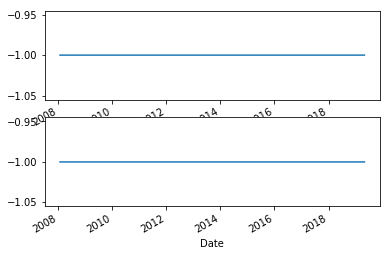

In [43]:
fig, axes = plt.subplots(2, 1)
port_cumret.plot(ax = axes[0], legend = None)
port_dd.plot(ax = axes[1], legend = None)